In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout 
from scipy import signal
from matplotlib import gridspec
from scipy.fft import fftshift
import warnings

In [2]:
seisz = pd.read_csv(r"C:\Users\cacam\Documents\data_files\huddle_files\2024-08-14_Z_2.csv", delimiter=',')
seisn = pd.read_csv(r"C:\Users\cacam\Documents\data_files\huddle_files\2024-08-14-E_2.csv", delimiter=',')
seise = pd.read_csv(r"C:\Users\cacam\Documents\data_files\huddle_files\2024-08-14-N_2.csv", delimiter=',')

tim = seisz['Time']
z = seisz['Sample'] * 0.0015 * 10 ** -6
n = seisn['Sample'] * 0.0015 * 10 ** -6
e = seise['Sample'] * 0.0015 * 10 ** -6

################################################ Do not change this value ######################################################
fs = 200

In [3]:
huddle = pd.read_csv(r"C:\Users\cacam\Documents\data_files\huddle_files\huddle_data_file_8_14.txt", delimiter="\s+")

huddle.columns = ["frequency", "x", "y", "z"]

hf = huddle["frequency"]
hx = huddle["x"] * 0.0076 * 10 ** -6
hy = huddle["y"] * 0.0076 * 10 ** -6
hz = huddle["z"] * 0.0076 * 10 ** -6

In [5]:
##################################################### Plot limits ##############################################################

y_max = 10e-1
y_min = 50e-4 

x_max = 100
x_min = 0.1

###################################################### fft length ##############################################################
fft_length = 128

################################################# Precent FFT Overlap ##########################################################
overlap = 50

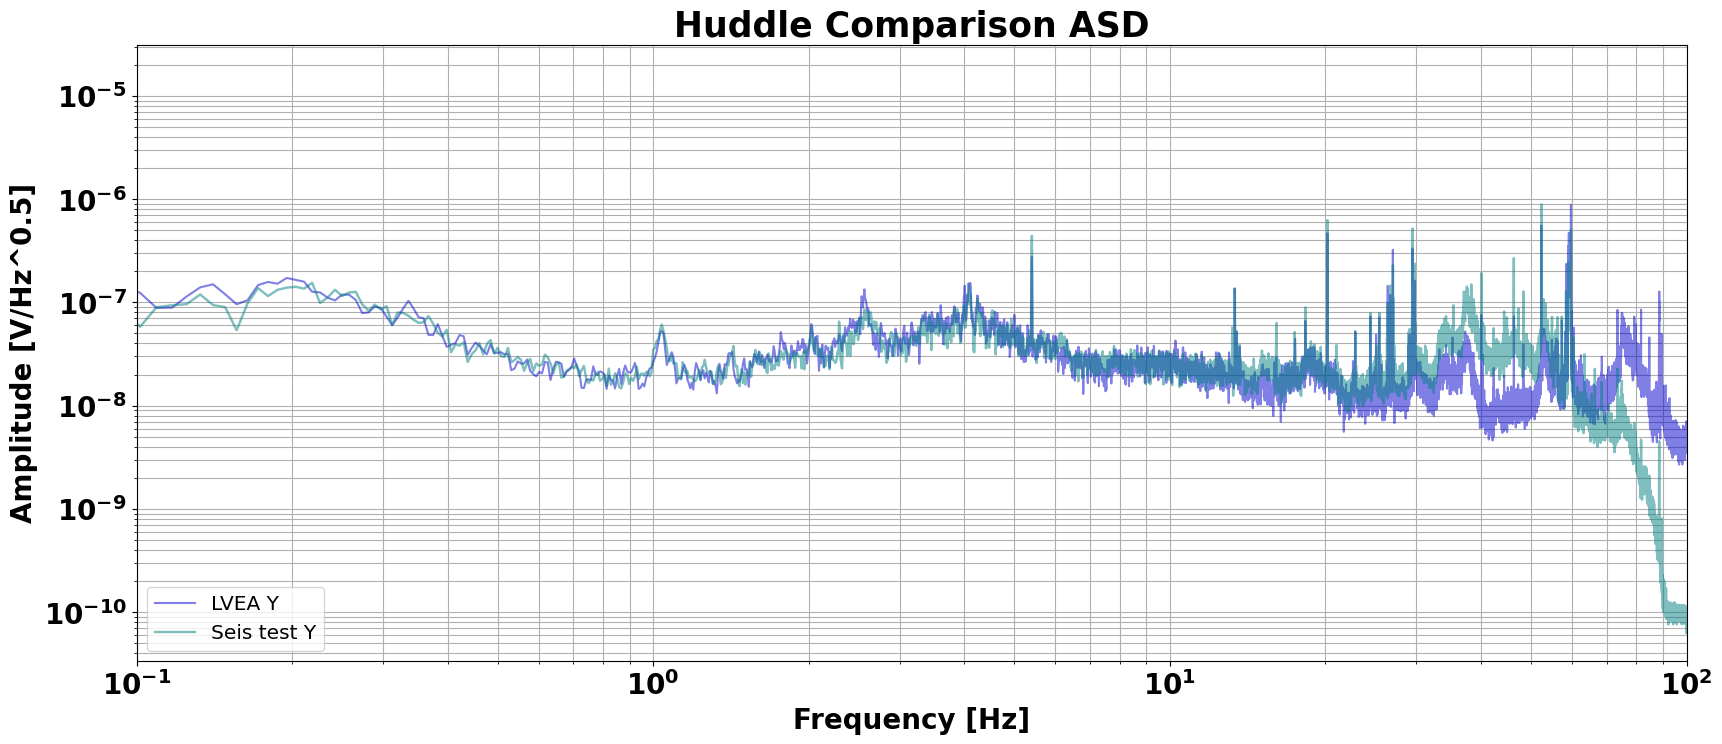

In [55]:
################################################################################################################################
######################################## The PSD is calculated via welch from scipy ############################################
################################################################################################################################
warnings.simplefilter('ignore')

############ If you don't want to look at the whole time series, you can add '1' to the variables, i.e k1, j1, i1 ##############

f_z, Pxx_den_z = signal.welch(z[0:-140800], fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs / (overlap *0.01)) )
f_n, Pxx_den_n = signal.welch(n[0:-140800], fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs / (overlap *0.01)) )
f_e, Pxx_den_e = signal.welch(e[0:-140800], fs, window= 'hamming', nperseg= (fs *fft_length), noverlap= round(fs / (overlap *0.01)) )

################### nfft is how long the fft bin lengths, noverlap is bin overlap, window is the window used ###################
####################### We used 100 sec bins, 0.5 sec overlap, and hamming window, these can be changed ########################
################################################ # DO NOT CHANGE/REMOVE 'fs' # #################################################

az = np.sqrt(Pxx_den_z)
an = np.sqrt(Pxx_den_n) ################################ This turns the PSD into an ASD ########################################
ae = np.sqrt(Pxx_den_e)


log_z = np.log(az)
log_n = np.log(an) ############ The log of each PSD must be found in order to find the peaks/frequences #################
log_e = np.log(ae)


################################################################################################################################
##################################################### Plots peaks ##############################################################

plt.figure(figsize = (20, 8))#, dpi = 2500)


###################################################### PLots data ##############################################################

plt.yscale('log')
plt.xscale('log')

#plt.plot(hf,hx, color = "darkred", label = "LVEA X", alpha = 0.5)
plt.plot(hf,hy, color = "mediumblue", label = "LVEA Y", alpha = 0.5)
#plt.plot(hf,hz, color = "green", label = "LVEA Z", alpha = 0.5)

#plt.plot(f_z, az, color = 'black', linewidth = 1.75, label = 'Seis test Z', alpha = 0.5)
#plt.plot(f_n, an, color = 'red', linewidth = 1.75, label = 'Seis test X', alpha = 0.5)
plt.plot(f_e, ae, color = 'teal', linewidth = 1.75, label = 'Seis test Y', alpha = 0.5)


plt.legend(loc = "lower left", fontsize = 14.5)

plt.title("Huddle Comparison ASD", fontweight = 'bold', fontsize = 25)
plt.xlabel("Frequency [Hz]", fontweight = "bold", fontsize = 20)
plt.ylabel("Amplitude [V/Hz^0.5]", fontweight = "bold", fontsize = 20)

plt.yticks(fontsize = 20, fontweight = "bold")
plt.xticks(fontsize = 20, fontweight = "bold")

#plt.ylim(y_min,y_max)
plt.xlim(x_min,x_max)

plt.grid(True, which="both", ls="-")

#plt.savefig('**place_img_name_here.format**', bbox_inches='tight')